<a href="https://colab.research.google.com/github/erenay93/CSE564_Deep_Learning/blob/master/CSE564_DeepLearning_HW4_HW5_ErenAy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip3 install --upgrade tensorflow

    100% |████████████████████████████████| 109.2MB 17kB/s 
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 112kB 1.5MB/s 
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46173aa79f981/termcolor-1.1.0.tar.gz
    100% |████████████████████████████████| 2.5MB 608kB/s 
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 3.2MB 425kB/s 
    100% |████████████████████████████████| 1.3MB 1.0MB/s 
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 491kB 732kB/s 
    100% |████████████████████████████████| 51kB 984kB/s 
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserializat

In [0]:
!pip3 install tensorflow==2.0.0b1
!pip3 show tensorflow

    100% |████████████████████████████████| 87.9MB 21kB/s 
  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7c/7a/9dd834766819195bb054ac7d60aba291e6304301a001751dccb4486b444e/protobuf-3.11.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/06/bd/acb44d9a4152835200f5f28c14c901d540cf43be4c7d8a5d3ed613677b1e/grpcio-1.25.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d1/4f/950dfae467b384fc96bc6469de25d832534f6b4441033c39f914efd13418/astor-0.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Ke

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
#assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

/home/eren/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/eren/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/eren/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/eren/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [2]:
#import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
#dataset = np.load(path)
len(train_images)

50000

In [0]:
# convert from integers to floats
	train_norm = train_images.astype('float32')
	test_norm = test_images.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0

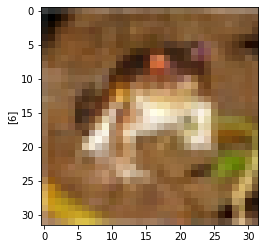

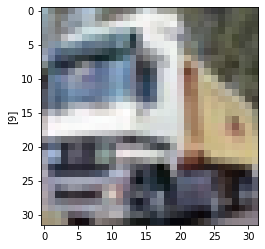

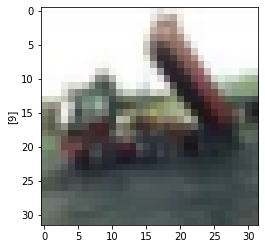

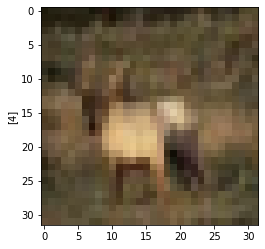

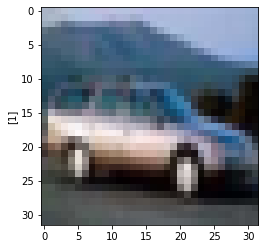

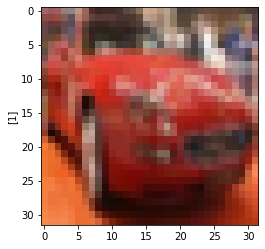

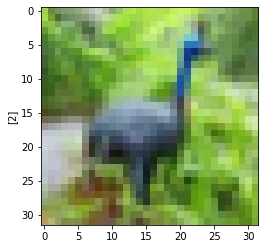

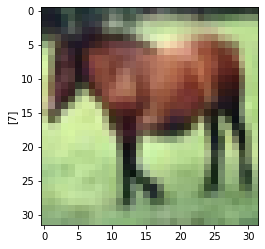

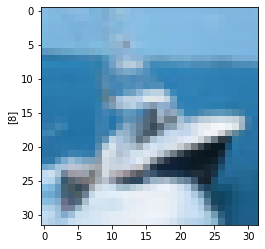

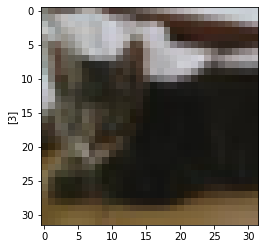

In [76]:
#import numpy as np
#import matplotlib.pyplot as plt

for i in range(0,10):
  two_d = (np.reshape(train_norm[i], (32, 32, 3)) * 255).astype(np.uint8)
  plt.imshow(two_d, interpolation='nearest', vmin=0, vmax=255)
  plt.ylabel(train_labels[i])
  plt.show()


In [92]:
model_relu = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation='relu',  kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_relu.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history_relu = model_relu.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 62us/sample - loss: 2.0919 - accuracy: 0.2429 - val_loss: 1.9644 - val_accuracy: 0.2954
Epoch 2/10
50000/50000 [==============================] - 3s 59us/sample - loss: 1.9171 - accuracy: 0.3228 - val_loss: 1.8819 - val_accuracy: 0.3374
Epoch 3/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.8496 - accuracy: 0.3508 - val_loss: 1.8251 - val_accuracy: 0.3579
Epoch 4/10
50000/50000 [==============================] - 3s 54us/sample - loss: 1.8059 - accuracy: 0.3670 - val_loss: 1.7910 - val_accuracy: 0.3692
Epoch 5/10
50000/50000 [==============================] - 3s 53us/sample - loss: 1.7721 - accuracy: 0.3801 - val_loss: 1.7619 - val_accuracy: 0.3763
Epoch 6/10
50000/50000 [==============================] - 3s 51us/sample - loss: 1.7438 - accuracy: 0.3906 - val_loss: 1.7312 - val_accuracy: 0.3909
Epoch 7/10
50000/50000 [==============================] 

In [73]:
model_elu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation='elu', kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation='elu',  kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_elu.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history_elu = model_elu.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 60us/sample - loss: 2.0299 - accuracy: 0.2680 - val_loss: 1.9154 - val_accuracy: 0.3279
Epoch 2/10
50000/50000 [==============================] - 3s 58us/sample - loss: 1.8686 - accuracy: 0.3418 - val_loss: 1.8483 - val_accuracy: 0.3503
Epoch 3/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.8157 - accuracy: 0.3628 - val_loss: 1.8035 - val_accuracy: 0.3713
Epoch 4/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.7832 - accuracy: 0.3762 - val_loss: 1.7712 - val_accuracy: 0.3830
Epoch 5/10
50000/50000 [==============================] - 3s 59us/sample - loss: 1.7583 - accuracy: 0.3878 - val_loss: 1.7458 - val_accuracy: 0.3928
Epoch 6/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.7369 - accuracy: 0.3943 - val_loss: 1.7337 - val_accuracy: 0.3920
Epoch 7/10
50000/50000 [==============================] 

In [43]:
model_tanh = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation='tanh', kernel_initializer="glorot_uniform"),
    keras.layers.Dense(100, activation='tanh',  kernel_initializer="glorot_uniform"),
    keras.layers.Dense(10, activation="softmax")
])

model_tanh.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history_tanh = model_tanh.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 3s 58us/sample - loss: 2.0921 - accuracy: 0.2520 - val_loss: 1.9617 - val_accuracy: 0.3076
Epoch 2/10
45000/45000 [==============================] - 3s 58us/sample - loss: 1.9275 - accuracy: 0.3232 - val_loss: 1.8832 - val_accuracy: 0.3324
Epoch 3/10
45000/45000 [==============================] - 2s 55us/sample - loss: 1.8648 - accuracy: 0.3491 - val_loss: 1.8280 - val_accuracy: 0.3558
Epoch 4/10
45000/45000 [==============================] - 3s 57us/sample - loss: 1.8276 - accuracy: 0.3618 - val_loss: 1.7986 - val_accuracy: 0.3702
Epoch 5/10
45000/45000 [==============================] - 3s 57us/sample - loss: 1.8011 - accuracy: 0.3717 - val_loss: 1.7883 - val_accuracy: 0.3656
Epoch 6/10
45000/45000 [==============================] - 3s 56us/sample - loss: 1.7800 - accuracy: 0.3805 - val_loss: 1.7712 - val_accuracy: 0.3696
Epoch 7/10
45000/45000 [==============================] -

In [45]:
model_selu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation='selu', kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation='selu',  kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_selu.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history_selu = model_selu.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 3s 69us/sample - loss: 1.9939 - accuracy: 0.2848 - val_loss: 1.8754 - val_accuracy: 0.3326
Epoch 2/10
45000/45000 [==============================] - 3s 61us/sample - loss: 1.8473 - accuracy: 0.3530 - val_loss: 1.7995 - val_accuracy: 0.3740
Epoch 3/10
45000/45000 [==============================] - 3s 59us/sample - loss: 1.7979 - accuracy: 0.3732 - val_loss: 1.7566 - val_accuracy: 0.3910
Epoch 4/10
45000/45000 [==============================] - 3s 58us/sample - loss: 1.7667 - accuracy: 0.3838 - val_loss: 1.7471 - val_accuracy: 0.3784
Epoch 5/10
45000/45000 [==============================] - 3s 57us/sample - loss: 1.7436 - accuracy: 0.3937 - val_loss: 1.7397 - val_accuracy: 0.3908
Epoch 6/10
45000/45000 [==============================] - 3s 58us/sample - loss: 1.7235 - accuracy: 0.4013 - val_loss: 1.7147 - val_accuracy: 0.4070
Epoch 7/10
45000/45000 [==============================] -

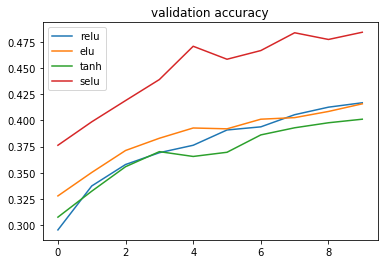

In [93]:
plt.plot(history_relu.history['val_accuracy'])
plt.plot(history_elu.history['val_accuracy'])
plt.plot(history_tanh.history['val_accuracy'])
plt.plot(history_selu.history['val_accuracy'])
plt.title('validation accuracy')
plt.legend(['relu', 'elu', 'tanh', 'selu'], loc='upper left')
plt.show()

In [50]:
model_selu_momentum = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation='selu', kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation='selu',  kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_selu_momentum.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9),
              metrics=["accuracy"])

history_selu_momentum = model_selu_momentum.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 78us/sample - loss: 1.8710 - accuracy: 0.3328 - val_loss: 1.7250 - val_accuracy: 0.3940
Epoch 2/10
50000/50000 [==============================] - 4s 71us/sample - loss: 1.7101 - accuracy: 0.3960 - val_loss: 1.6975 - val_accuracy: 0.4035
Epoch 3/10
50000/50000 [==============================] - 4s 71us/sample - loss: 1.6332 - accuracy: 0.4236 - val_loss: 1.5959 - val_accuracy: 0.4395
Epoch 4/10
50000/50000 [==============================] - 4s 71us/sample - loss: 1.5806 - accuracy: 0.4418 - val_loss: 1.5676 - val_accuracy: 0.4406
Epoch 5/10
50000/50000 [==============================] - 4s 71us/sample - loss: 1.5399 - accuracy: 0.4559 - val_loss: 1.5526 - val_accuracy: 0.4475
Epoch 6/10
50000/50000 [==============================] - 4s 71us/sample - loss: 1.5083 - accuracy: 0.4651 - val_loss: 1.5044 - val_accuracy: 0.4649
Epoch 7/10
50000/50000 [==============================] 

In [51]:
model_elu_momentum = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation='elu', kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation='elu',  kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_elu_momentum.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9),
              metrics=["accuracy"])

history_elu_momentum = model_elu_momentum.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 73us/sample - loss: 1.8697 - accuracy: 0.3358 - val_loss: 1.7993 - val_accuracy: 0.3480
Epoch 2/10
50000/50000 [==============================] - 3s 69us/sample - loss: 1.7076 - accuracy: 0.3979 - val_loss: 1.6686 - val_accuracy: 0.4122
Epoch 3/10
50000/50000 [==============================] - 3s 70us/sample - loss: 1.6341 - accuracy: 0.4232 - val_loss: 1.6536 - val_accuracy: 0.4093
Epoch 4/10
50000/50000 [==============================] - 4s 72us/sample - loss: 1.5865 - accuracy: 0.4412 - val_loss: 1.6435 - val_accuracy: 0.4299
Epoch 5/10
50000/50000 [==============================] - 4s 70us/sample - loss: 1.5452 - accuracy: 0.4545 - val_loss: 1.5367 - val_accuracy: 0.4536
Epoch 6/10
50000/50000 [==============================] - 4s 71us/sample - loss: 1.5154 - accuracy: 0.4669 - val_loss: 1.5185 - val_accuracy: 0.4617
Epoch 7/10
50000/50000 [==============================] 

In [52]:
model_selu_nesterov = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation='selu', kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation='selu',  kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_selu_nesterov.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
              metrics=["accuracy"])

history_selu_nesterov = model_selu_nesterov.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 76us/sample - loss: 1.8297 - accuracy: 0.3509 - val_loss: 1.7070 - val_accuracy: 0.3983
Epoch 2/10
50000/50000 [==============================] - 4s 73us/sample - loss: 1.6760 - accuracy: 0.4085 - val_loss: 1.6542 - val_accuracy: 0.4187
Epoch 3/10
50000/50000 [==============================] - 4s 73us/sample - loss: 1.6046 - accuracy: 0.4302 - val_loss: 1.5729 - val_accuracy: 0.4447
Epoch 4/10
50000/50000 [==============================] - 4s 73us/sample - loss: 1.5580 - accuracy: 0.4500 - val_loss: 1.5534 - val_accuracy: 0.4526
Epoch 5/10
50000/50000 [==============================] - 4s 73us/sample - loss: 1.5213 - accuracy: 0.4621 - val_loss: 1.5330 - val_accuracy: 0.4568
Epoch 6/10
50000/50000 [==============================] - 4s 74us/sample - loss: 1.4915 - accuracy: 0.4738 - val_loss: 1.5257 - val_accuracy: 0.4567
Epoch 7/10
50000/50000 [==============================] 

In [53]:
model_elu_nesterov = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation='elu', kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation='elu',  kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_elu_nesterov.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
              metrics=["accuracy"])

history_elu_nesterov = model_elu_nesterov.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 73us/sample - loss: 1.8617 - accuracy: 0.3396 - val_loss: 1.7953 - val_accuracy: 0.3567
Epoch 2/10
50000/50000 [==============================] - 3s 65us/sample - loss: 1.6997 - accuracy: 0.4012 - val_loss: 1.6428 - val_accuracy: 0.4248
Epoch 3/10
50000/50000 [==============================] - 3s 68us/sample - loss: 1.6227 - accuracy: 0.4286 - val_loss: 1.5937 - val_accuracy: 0.4359
Epoch 4/10
50000/50000 [==============================] - 4s 71us/sample - loss: 1.5705 - accuracy: 0.4482 - val_loss: 1.5923 - val_accuracy: 0.4419
Epoch 5/10
50000/50000 [==============================] - 3s 69us/sample - loss: 1.5335 - accuracy: 0.4588 - val_loss: 1.5552 - val_accuracy: 0.4473
Epoch 6/10
50000/50000 [==============================] - 4s 74us/sample - loss: 1.5008 - accuracy: 0.4694 - val_loss: 1.4939 - val_accuracy: 0.4731
Epoch 7/10
50000/50000 [==============================] 

In [55]:
model_selu_rmsprop = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation='selu', kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation='selu',  kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_selu_rmsprop.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9),
              metrics=["accuracy"])

history_selu_rmsprop = model_selu_rmsprop.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 111us/sample - loss: 2.0437 - accuracy: 0.2911 - val_loss: 1.9687 - val_accuracy: 0.3017
Epoch 2/10
50000/50000 [==============================] - 5s 107us/sample - loss: 1.7383 - accuracy: 0.3763 - val_loss: 1.7432 - val_accuracy: 0.3674
Epoch 3/10
50000/50000 [==============================] - 5s 103us/sample - loss: 1.6450 - accuracy: 0.4123 - val_loss: 1.7607 - val_accuracy: 0.3727
Epoch 4/10
50000/50000 [==============================] - 6s 111us/sample - loss: 1.5806 - accuracy: 0.4355 - val_loss: 1.5655 - val_accuracy: 0.4384
Epoch 5/10
50000/50000 [==============================] - 5s 109us/sample - loss: 1.5325 - accuracy: 0.4523 - val_loss: 1.6397 - val_accuracy: 0.4206
Epoch 6/10
50000/50000 [==============================] - 6s 111us/sample - loss: 1.4971 - accuracy: 0.4683 - val_loss: 1.5023 - val_accuracy: 0.4677
Epoch 7/10
50000/50000 [==========================

In [56]:
model_elu_rmsprop = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation='elu', kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation='elu',  kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_elu_rmsprop.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9),
              metrics=["accuracy"])

history_elu_rmsprop = model_elu_rmsprop.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 106us/sample - loss: 1.9304 - accuracy: 0.3089 - val_loss: 1.7000 - val_accuracy: 0.3953
Epoch 2/10
50000/50000 [==============================] - 5s 108us/sample - loss: 1.6981 - accuracy: 0.3920 - val_loss: 1.7194 - val_accuracy: 0.3856
Epoch 3/10
50000/50000 [==============================] - 5s 107us/sample - loss: 1.6079 - accuracy: 0.4253 - val_loss: 1.6300 - val_accuracy: 0.4121
Epoch 4/10
50000/50000 [==============================] - 6s 110us/sample - loss: 1.5485 - accuracy: 0.4481 - val_loss: 1.6121 - val_accuracy: 0.4201
Epoch 5/10
50000/50000 [==============================] - 5s 101us/sample - loss: 1.5017 - accuracy: 0.4664 - val_loss: 1.6080 - val_accuracy: 0.4367
Epoch 6/10
50000/50000 [==============================] - 5s 98us/sample - loss: 1.4646 - accuracy: 0.4819 - val_loss: 1.5724 - val_accuracy: 0.4430
Epoch 7/10
50000/50000 [===========================

In [57]:
model_selu_adam = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation='selu', kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation='selu',  kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_selu_adam.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

history_selu_adam = model_selu_adam.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 82us/sample - loss: 1.8948 - accuracy: 0.3223 - val_loss: 1.7701 - val_accuracy: 0.3650
Epoch 2/10
50000/50000 [==============================] - 4s 71us/sample - loss: 1.6973 - accuracy: 0.3883 - val_loss: 1.6750 - val_accuracy: 0.4059
Epoch 3/10
50000/50000 [==============================] - 4s 70us/sample - loss: 1.6145 - accuracy: 0.4216 - val_loss: 1.6527 - val_accuracy: 0.4067
Epoch 4/10
50000/50000 [==============================] - 3s 70us/sample - loss: 1.5633 - accuracy: 0.4409 - val_loss: 1.6242 - val_accuracy: 0.4231
Epoch 5/10
50000/50000 [==============================] - 4s 71us/sample - loss: 1.5281 - accuracy: 0.4534 - val_loss: 1.5114 - val_accuracy: 0.4691
Epoch 6/10
50000/50000 [==============================] - 4s 78us/sample - loss: 1.4979 - accuracy: 0.4650 - val_loss: 1.4742 - val_accuracy: 0.4767
Epoch 7/10
50000/50000 [==============================] 

In [58]:
model_elu_adam = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation='elu', kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation='elu',  kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_elu_adam.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

history_elu_adam = model_elu_adam.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 82us/sample - loss: 1.8508 - accuracy: 0.3357 - val_loss: 1.6855 - val_accuracy: 0.4010
Epoch 2/10
50000/50000 [==============================] - 4s 78us/sample - loss: 1.6570 - accuracy: 0.4049 - val_loss: 1.5967 - val_accuracy: 0.4268
Epoch 3/10
50000/50000 [==============================] - 4s 81us/sample - loss: 1.5817 - accuracy: 0.4336 - val_loss: 1.5482 - val_accuracy: 0.4415
Epoch 4/10
50000/50000 [==============================] - 4s 76us/sample - loss: 1.5297 - accuracy: 0.4494 - val_loss: 1.5191 - val_accuracy: 0.4542
Epoch 5/10
50000/50000 [==============================] - 4s 78us/sample - loss: 1.4953 - accuracy: 0.4622 - val_loss: 1.5590 - val_accuracy: 0.4407
Epoch 6/10
50000/50000 [==============================] - 4s 79us/sample - loss: 1.4664 - accuracy: 0.4749 - val_loss: 1.5423 - val_accuracy: 0.4532
Epoch 7/10
50000/50000 [==============================] 

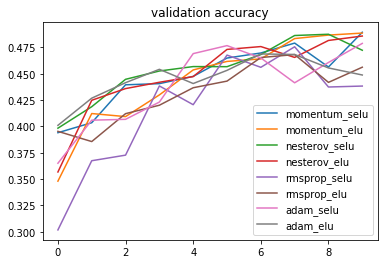

In [61]:
plt.plot(history_selu_momentum.history['val_accuracy'])
plt.plot(history_elu_momentum.history['val_accuracy'])
plt.plot(history_selu_nesterov.history['val_accuracy'])
plt.plot(history_elu_nesterov.history['val_accuracy'])
plt.plot(history_selu_rmsprop.history['val_accuracy'])
plt.plot(history_elu_rmsprop.history['val_accuracy'])
plt.plot(history_selu_adam.history['val_accuracy'])
plt.plot(history_elu_adam.history['val_accuracy'])
plt.title('validation accuracy')
plt.legend(['momentum_selu', 'momentum_elu', 'nesterov_selu', 'nesterov_elu', 'rmsprop_selu', 'rmsprop_elu', 'adam_selu', 'adam_elu'], loc='lower right')
plt.show()

In [63]:
model_selu_momentum_bn = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='selu', kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='selu',  kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model_selu_momentum_bn.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9),
              metrics=["accuracy"])

history_selu_momentum_bn = model_selu_momentum_bn.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 121us/sample - loss: 1.7402 - accuracy: 0.3854 - val_loss: 1.5867 - val_accuracy: 0.4419
Epoch 2/10
50000/50000 [==============================] - 5s 109us/sample - loss: 1.5744 - accuracy: 0.4471 - val_loss: 1.5214 - val_accuracy: 0.4658
Epoch 3/10
50000/50000 [==============================] - 6s 111us/sample - loss: 1.5089 - accuracy: 0.4684 - val_loss: 1.4698 - val_accuracy: 0.4788
Epoch 4/10
50000/50000 [==============================] - 6s 114us/sample - loss: 1.4602 - accuracy: 0.4849 - val_loss: 1.4413 - val_accuracy: 0.4913
Epoch 5/10
50000/50000 [==============================] - 6s 112us/sample - loss: 1.4289 - accuracy: 0.4976 - val_loss: 1.4211 - val_accuracy: 0.4984
Epoch 6/10
50000/50000 [==============================] - 6s 111us/sample - loss: 1.3953 - accuracy: 0.5080 - val_loss: 1.4149 - val_accuracy: 0.5002
Epoch 7/10
50000/50000 [==========================

In [64]:
model_selu_momentum_dropout = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation='selu', kernel_initializer="lecun_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation='selu',  kernel_initializer="lecun_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model_selu_momentum_dropout.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9),
              metrics=["accuracy"])

history_selu_momentum_dropout = model_selu_momentum_dropout.fit(train_norm, train_labels, epochs=10,
                    validation_data=(test_norm, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 98us/sample - loss: 2.0639 - accuracy: 0.2741 - val_loss: 1.8154 - val_accuracy: 0.3617
Epoch 2/10
50000/50000 [==============================] - 4s 90us/sample - loss: 1.8884 - accuracy: 0.3234 - val_loss: 1.7539 - val_accuracy: 0.3790
Epoch 3/10
50000/50000 [==============================] - 4s 89us/sample - loss: 1.8346 - accuracy: 0.3445 - val_loss: 1.7718 - val_accuracy: 0.3717
Epoch 4/10
50000/50000 [==============================] - 5s 103us/sample - loss: 1.8006 - accuracy: 0.3578 - val_loss: 1.6969 - val_accuracy: 0.3932
Epoch 5/10
50000/50000 [==============================] - 4s 86us/sample - loss: 1.7656 - accuracy: 0.3695 - val_loss: 1.6578 - val_accuracy: 0.4141
Epoch 6/10
50000/50000 [==============================] - 4s 88us/sample - loss: 1.7419 - accuracy: 0.3803 - val_loss: 1.6438 - val_accuracy: 0.4194
Epoch 7/10
50000/50000 [==============================]